<a href="https://colab.research.google.com/github/Fellipe0/Hill-Chart-Comparation/blob/main/Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**olhar**: https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import Normalizer

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import math

def normalize(array):
  return [(array[n] - min(array)) / (max(array) - min(array)) for n in range(len(array))]

def load_dataset():
  # Função de carregamento dos dados da tabela
  def load_spreadsheet():
    input = []
    output = []

    caminho_ate_arquivo = '/content/drive/MyDrive/Faculdade/IC/Felipe Libório/Artigos/Algoritmo/Dados Sensores.xlsx'
    train_dataset = pd.read_excel(caminho_ate_arquivo)
    size = len(list(train_dataset['Queda']))

    queda = normalize(list(train_dataset['Queda']))
    vazao = normalize(list(train_dataset['Vazao']))
    eficiencia = normalize(list(train_dataset['Rendimento']))
    potencia = normalize(list(train_dataset['Potencia']))
    percentual = normalize(list(train_dataset['DistribuidorD']))
    angulo = normalize(list(train_dataset['RotorD']))

    for i in range(size):
      input.append( [queda[i],vazao[i]] )
      output.append( [eficiencia[i],potencia[i],percentual[i],angulo[i]] )

    return input,output

  data,target = load_spreadsheet()

  data = np.array(data, dtype=float)
  target = np.array(target, dtype=float)

  return train_test_split(data,target,test_size=0.2,random_state=5)
# ---------------------------------------------------------------------------------------------------------------------------------------------------------
# Calcular e printar resultados
def calculateAndPrintEfficience(obtido,real):
  # Calculo de erros
  def mean_absolute_error(predict,expected):
    qtd = len(predict)
    valor = 0
    for n in range(qtd):
      valor += abs(predict[n] - expected[n])
    out = valor/qtd
    return out

  def mean_squared_error(predict,expected):
    qtd = len(predict)
    valor = 0
    for n in range(qtd):
      valor += (predict[n] - expected[n])**2
    out = valor/qtd
    return math.sqrt(out)

  mae_1 = mean_absolute_error(obtido[:,0],real[:,0]);
  mae_2 = mean_absolute_error(obtido[:,1],real[:,1]);
  mae_3 = mean_absolute_error(obtido[:,2],real[:,2]);
  mae_4 = mean_absolute_error(obtido[:,3],real[:,3]);

  rmse_1 = mean_squared_error(obtido[:,0],real[:,0]);
  rmse_2 = mean_squared_error(obtido[:,1],real[:,1]);
  rmse_3 = mean_squared_error(obtido[:,2],real[:,2]);
  rmse_4 = mean_squared_error(obtido[:,3],real[:,3]);

#R² sempre colocar (original, predito)
  r2_1 = r2_score(obtido[:,0],real[:,0]);
  r2_2 = r2_score(obtido[:,1],real[:,1]);
  r2_3 = r2_score(obtido[:,2],real[:,2]);
  r2_4 = r2_score(obtido[:,3],real[:,3]);

  # Metodo de realizar o print
  def printMethod(title,data):
    format_row = "{:>12}" * (len(title) + 1);

    print(format_row.format(" ",*title));
    for element in data:
      print(format_row.format(*element));

  titlePrint = ["Eficiência", "Potência","Percentual","Ângulo"];
  dataPrint = [["RMSE", "{:.4f}".format(rmse_1) , "{:.4f}".format(rmse_2) , "{:.4f}".format(rmse_3) , "{:.4f}".format(rmse_4)],
              ["MAE", "{:.4f}".format(mae_1) , "{:.4f}".format(mae_2) , "{:.4f}".format(mae_3) , "{:.4f}".format(mae_4)],
              ["R²", "{:.4f}".format(r2_1) , "{:.4f}".format(r2_2) , "{:.4f}".format(r2_3) , "{:.4f}".format(r2_4)]];
  printMethod(titlePrint,dataPrint)

def plot_grafic(y_real,y_predito):
  titlePrint = ["Eficiência", "Potência","Percentual","Ângulo"];
  print("Plot results")
  for n in range(y_real.shape[1]):
    plt.plot(y_real[:,n], 'b-', label="Real")
    plt.plot(y_predito[:,n], 'g--', label="Predito")
    plt.legend()
    plt.ylabel(titlePrint[n]);
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = load_dataset()

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y1 = reg.predict(X_train);
y2 = reg.predict(X_test);

print("================================= Train =================================")
calculateAndPrintEfficience(y1,y_train)
plot_grafic(y_train,y1)
print("\n")
print("================================= Test =================================")
calculateAndPrintEfficience(y2,y_test)
plot_grafic(y_test,y2)

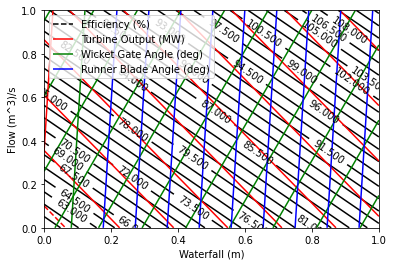

In [ ]:
Points = 100;
Rotation = np.linspace( 0 , 20 , Points )
Flow = np.linspace( 0 , 600 , Points )
[VecRotation,VecFlow] = np.meshgrid(normalize(Rotation),normalize(Flow));

p = np.transpose([VecRotation[:,0],VecFlow[:,0]]);
Hat_Efficiency_2 = [reg.predict(p)]
for i in range(1,Points):
  p = np.transpose([VecRotation[:,i],VecFlow[:,i]]);
  Hat_Efficiency_2.append(reg.predict(p))
Hat_Efficiency_2 = np.array(Hat_Efficiency_2,dtype=float);

c = plt.contour(VecRotation, VecFlow, (Hat_Efficiency_2[:,:,0]*100), 50, colors='k');
c = plt.clabel(c,colors='black')
c = plt.contour(VecRotation, VecFlow, Hat_Efficiency_2[:,:,1], 10, colors='r');
#plt.clabel(c,colors='red')
c = plt.contour(VecRotation, VecFlow, Hat_Efficiency_2[:,:,2], 10, colors='g');
#plt.clabel(c,colors='green')
c = plt.contour(VecRotation, VecFlow, Hat_Efficiency_2[:,:,3], 10, colors='b');
#plt.clabel(c,colors='blue')

labels = ['Efficiency (%)','Turbine Output (MW)','Wicket Gate Angle (deg)','Runner Blade Angle (deg)'];
color = ['k','r','g','b'];
for i in range(len(labels)):
  c.collections[i].set_label(labels[i]);
  c.collections[i].set_color(color[i]);
plt.legend(loc='upper left');
plt.xlabel('Waterfall (m)');
plt.ylabel('Flow (m^3)/s');